<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>Chair of Soil Mechanics and Foundation Engineering<br>Geotechnical Institute<br>Technische Universität Bergakademie Freiberg.</p>
        <p><a href="https://tu-freiberg.de/en/soilmechanics">https://tu-freiberg.de/en/soilmechanics</a></p>
    </div>
</div>

# Elastodynamik 3D

Module laden

In [1]:
from IPython.display import display, Math, Latex
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
from sympy.interactive import printing
import plot_functions.plot_settings
%run plot_functions/wave3d_reflection_interaction.ipynb
printing.init_printing(use_latex='mathjax')

_Last line enables special comment **##:** for LaTeX formatting of output_ 

## Reflexion einer P-Welle am freien Rand

![wave3d_freeBC.svg](https://github.com/nagelt/soil_dynamics/raw/master/Images/wave3d_freeBC.svg)

Variablen für symbolische Rechnung (sympy) deklarieren

In [2]:
mu, Lambda, alpha, beta, AP_in, AP_re, AS_re, kappa_P, kappa_S, c_P, c_S, x,y,z,t = sp.symbols('mu Lambda alpha beta AP_in AP_re AS_re kappa_P kappa_S c_P c_S x y z t')

Phasen der einfallenden P-Welle, der reflektierten P-Welle und der reflektierten SH-Welle

In [3]:
phase_Pin = sp.I*kappa_P*(x*sp.sin(alpha) + y*sp.cos(alpha) - c_P*t)
phase_Pre = sp.I*kappa_P*(x*sp.sin(alpha) - y*sp.cos(alpha) - c_P*t)
phase_Sre = sp.I*kappa_S*(x*sp.sin( beta) - y*sp.cos( beta) - c_S*t)

Komplexe Darstellung der Wellenausbreitung aller drei Wellen

In [4]:
eP_in = AP_in * sp.exp(phase_Pin)
eP_re = AP_re * sp.exp(phase_Pre)
eS_re = AS_re * sp.exp(phase_Sre)

Veschiebungen (x,y) der drei Wellenfelder

In [5]:
uP_in = sp.sin(alpha) * eP_in
uP_re = sp.sin(alpha) * eP_re
uS_re = sp.cos( beta) * eS_re

In [6]:
vP_in = sp.cos(alpha) * eP_in
vP_re =-sp.cos(alpha) * eP_re
vS_re = sp.sin( beta) * eS_re

Spannungen $\sigma_{xy}$ und $\sigma_{yy}$, die relevant für die Reflexion sind

In [7]:
sigma_xy_Pin = mu*( sp.diff(uP_in, y) + sp.diff(vP_in, x) )
sigma_xy_Pre = mu*( sp.diff(uP_re, y) + sp.diff(vP_re, x) )
sigma_xy_Sre = mu*( sp.diff(uS_re, y) + sp.diff(vS_re, x) )

In [8]:
sigma_yy_Pin = (2*mu+Lambda)*sp.diff(vP_in, y) + Lambda*sp.diff(uP_in, x)
sigma_yy_Pre = (2*mu+Lambda)*sp.diff(vP_re, y) + Lambda*sp.diff(uP_re, x)
sigma_yy_Sre = (2*mu+Lambda)*sp.diff(vS_re, y) + Lambda*sp.diff(uS_re, x)

Auswertung der Spannungen am Rand

In [9]:
sigma_xy_BC = sp.simplify( sigma_xy_Pin*sp.exp(-phase_Pin)/sp.I + sigma_xy_Pre*sp.exp(-phase_Pre)/sp.I + sigma_xy_Sre*sp.exp(-phase_Sre)/sp.I)
sigma_yy_BC = sp.simplify( sigma_yy_Pin*sp.exp(-phase_Pin)/sp.I + sigma_yy_Pre*sp.exp(-phase_Pre)/sp.I + sigma_yy_Sre*sp.exp(-phase_Sre)/sp.I)

In [10]:
display(Math(r'\sigma_{xy}^\mathrm{BC}=' + sp.latex(sigma_xy_BC))) 
display(Math(r'\sigma_{yy}^\mathrm{BC}=' + sp.latex(sigma_yy_BC))) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Gleichungssystem der Randbedingungen (freier Rand) nach den Amplituden der reflektierten Wellen lösen

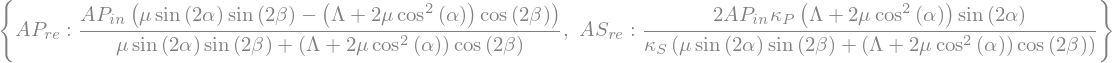

In [11]:
solution = sp.solve( [sigma_xy_BC, sigma_yy_BC], [AP_re, AS_re] )
for sol in solution:
    solution[sol] = solution[sol].simplify()
display(solution)

Grafische Darstellung der Reflexion

In [12]:
interactive_reflection_plot()  

interactive(children=(IntSlider(value=45, description=r'$\alpha$ [°]:', max=90), IntSlider(value=25, descripti…

Frage: In welchem Fall wird nur eine P-Welle reflektiert und in welchem nur eine S-Welle?